## Data Analysis using Python Mini-Project
### Comprehensive study of data

### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. It's very important to build the intuition. The process of data cleaning and visualization helps with that. In this mini project, I have tried to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

Here are the broad guidelines I have followed:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
loanstats = pd.read_csv('..\\Downloads\\LoanStats3a.csv',skiprows=[0])
loanstats.head()

C:\Users\Neelu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loanstats.shape

(42538, 145)

In [4]:
loanstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [5]:
# Checking for the NaN values present in columns
loanstats.isnull().sum()

id                                            42535
member_id                                     42538
loan_amnt                                         3
funded_amnt                                       3
funded_amnt_inv                                   3
term                                              3
int_rate                                          3
installment                                       3
grade                                             3
sub_grade                                         3
emp_title                                      2629
emp_length                                     1115
home_ownership                                    3
annual_inc                                        7
verification_status                               3
issue_d                                           3
loan_status                                       3
pymnt_plan                                        3
url                                           42538
desc        

In [6]:
## Dropping the columns having 42538 NaN values, beacuse they won't be of any use.

loan = loanstats.drop(['id','member_id','url','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term'],axis=1)

In [7]:
#Again, few more columns with 42538 are remaining.

loan.isnull().sum()

loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2629
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
desc                              13296
purpose                               3
title                                16
zip_code                              3
addr_state                            3
dti                                   3
delinq_2yrs                          32
earliest_cr_line                     32
inq_last_6mths                       32


In [8]:
# Dropping all the columns having 42538 NaN as their values.

loan = loan.drop(loan.columns[loan.isnull().sum() == 42538],axis=1)

In [9]:
# That leaves us with very few columns

loan.isnull().sum()

loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
term                              3
int_rate                          3
installment                       3
grade                             3
sub_grade                         3
emp_title                      2629
emp_length                     1115
home_ownership                    3
annual_inc                        7
verification_status               3
issue_d                           3
loan_status                       3
pymnt_plan                        3
desc                          13296
purpose                           3
title                            16
zip_code                          3
addr_state                        3
dti                               3
delinq_2yrs                      32
earliest_cr_line                 32
inq_last_6mths                   32
mths_since_last_delinq        26929
mths_since_last_record        38887
open_acc                    

# Features Studying 

#### Now we will take each column one by one and study them to make sense out of it. If require, we will clean the values for use. Later on we will check if they are useful for building a model.
#### We will see whether they have any impact on the interest rates or not.

In [10]:
# By picking up the 1st feature loan_amnt and checking rows with NaN values, we can see that they contain NaN for all columns. 

loan[loan['loan_amnt'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# So it's better to drop these rows

loan = loan.drop([39786,42536,42537],axis=0)

In [12]:
loan.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13293
purpose                           0
title                            13
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
mths_since_last_delinq        26926
mths_since_last_record        38884
open_acc                    

In [13]:
# Taking our next feature 'term', all the values are in months.
# So we can convert them into integer values.

loan['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [14]:
# extracting only numeric values.

loan['term'] = loan['term'].str.extract('(\d+)')

In [15]:
loan['term'] = pd.to_numeric(loan['term'], downcast='integer')
loan['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int8

In [16]:
# 'int_rate' is also present in object type. For calculations, converting it to float by extracting only numeric part of it.

loan['int_rate'].head()

0     10.65%
1     15.27%
2     15.96%
3     13.49%
4     12.69%
Name: int_rate, dtype: object

In [17]:
loan['int_rate'] = loan['int_rate'].str.extract('(\d+.\d+)')

In [18]:
loan['int_rate'] = pd.to_numeric(loan['int_rate'], downcast='float')
loan['int_rate'].head() # Now it can be usefull

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float32

In [19]:
# Let's import the matplotlib and seaborn library for visualization. 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
loan['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

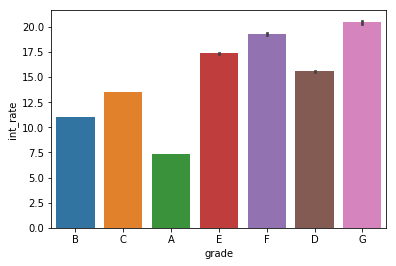

In [21]:
# By plot, we can see directly that grade G have the more interest rate than any other grade and A have minimum. And most of the
# accounts are in grade B category having interest rate between 10% to 12%.

sns.barplot(x='grade',y='int_rate',data=loan)

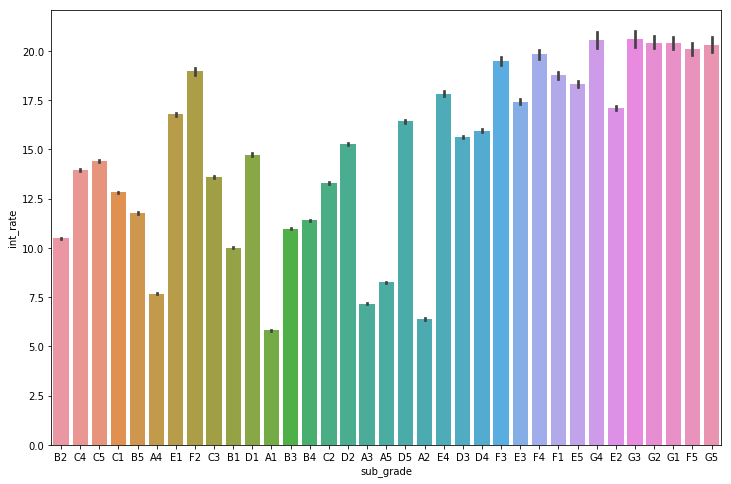

In [22]:
# Again, if we sub-categorise it, we can see interest rate difference.

plt.figure(figsize=(12,8))
sns.barplot(x='sub_grade',y='int_rate',data=loan)

In [23]:
# Here are the top 10 sub-grade categories order, targeting average high interest rates.

loan.groupby('sub_grade').int_rate.mean().nlargest(10)

sub_grade
G3    20.605824
G4    20.566971
G2    20.423178
G1    20.390427
G5    20.310698
F5    20.099741
F4    19.829052
F3    19.465382
F2    18.956753
F1    18.756020
Name: int_rate, dtype: float32

In [24]:
# Most of the accounts holder lives in rented place. Very few own a home.

loan['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

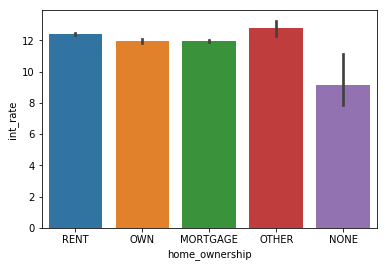

In [25]:
sns.barplot(x='home_ownership',y='int_rate',data = loan)

In [26]:
# In 'annual_inc' coulumn, 4 rows have NaN.

loan['annual_inc'].isnull().sum()

4

In [27]:
# 4 are vey few compared to 42535. We can fill these with the average value of this column.

loan['annual_inc'].mean()

69136.55642025822

In [28]:
loan['annual_inc'] = loan['annual_inc'].fillna(loan['annual_inc'].mean())

In [29]:
# By checking the verification status, we can see not most of the counts are verified.

loan['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

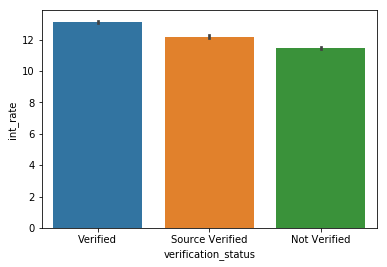

In [30]:
sns.barplot(x='verification_status',y='int_rate',data=loan)

In [31]:
# For ease, we can categories the status with numbers.

ver_dict = {'Verified':1,'Source Verified':2,'Not Verified':3}

loan['verification_status'] = loan['verification_status'].map(ver_dict)
loan['verification_status'].head()

0    1
1    2
2    3
3    2
4    2
Name: verification_status, dtype: int64

In [32]:
# All the values in column 'pymnt_plan' have the same velue 'n'. This doesn't infer anything or can help in any analysis. So I
# will just drop this field.

loan['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [33]:
loan = loan.drop('pymnt_plan',axis=1)

In [34]:
# Here are the purpose listed for every loan.

loan['purpose'].head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [35]:
# And we can see that most of the loans are for debt consolidation and credit cards purpose.

loan['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

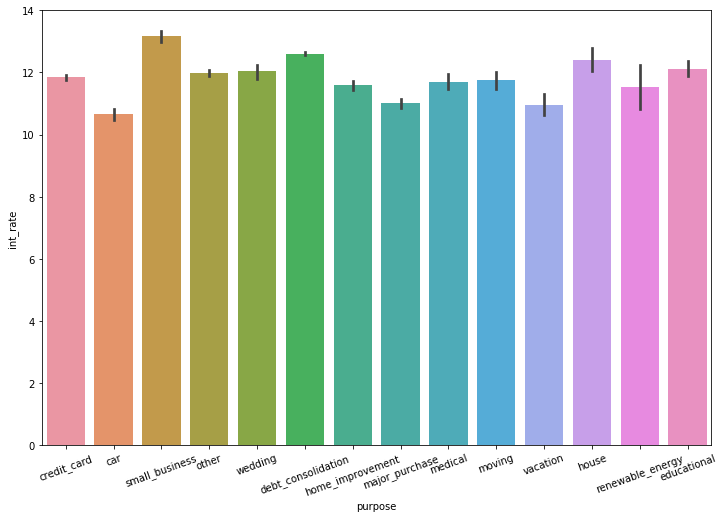

In [36]:
# Small business have the higest average interest rates and car loan have low, we can see in plot.

plt.figure(figsize=(12,8))
sns.barplot(x='purpose',y='int_rate',data=loan)
plt.xticks(rotation=20);

In [37]:
# This is similar to the feature 'purpose'. 'title' has an elobrate version of the purpose. So i am just droping it. We can use 
# 'purpose' for that.

loan['title'].head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [38]:
loan = loan.drop('title',axis=1)

In [39]:
# Here are the zip code and the state code listed.

loan[['zip_code','addr_state']].head()

,zip_code,addr_state
0,860xx,AZ
1,309xx,GA
2,606xx,IL
3,917xx,CA
4,972xx,OR


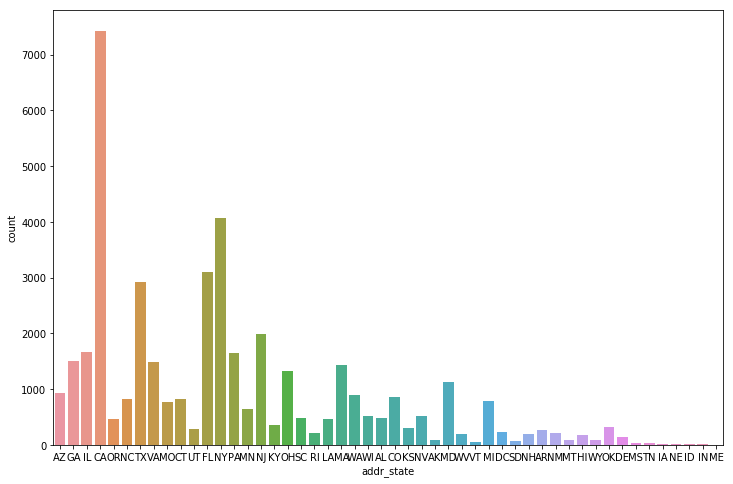

In [40]:
# We can see that large number of loan accounts are from California(CA) than any other state of US. So the company can target 
# CA for more loans.  

plt.figure(figsize=(12,8))
sns.countplot(x='addr_state', data=loan)

In [41]:
# Here are the top 10 state list which have loan accounts.

loan['addr_state'].value_counts().nlargest(10)

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
Name: addr_state, dtype: int64

In [42]:
# As the State information would give an idea about out maximum customers then we won't be needing zip code for every city.

loan = loan.drop('zip_code',axis=1)

In [43]:
loan['delinq_2yrs'].value_counts()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [44]:
loan['delinq_2yrs'] = loan['delinq_2yrs'].fillna(0.0)

In [45]:
loan['inq_last_6mths'] = loan['inq_last_6mths'].fillna(0.0)

In [46]:
loan['pub_rec'].value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [47]:
loan['pub_rec'] = loan['pub_rec'].fillna(0.0)

In [48]:
# 'revol_util' is an object type.

loan['revol_util'].head()

0    83.7%
1     9.4%
2    98.5%
3      21%
4    53.9%
Name: revol_util, dtype: object

In [49]:
# Converting 'revol_util' to float type so the values can be use in making predictions.

loan['revol_util'] = loan['revol_util'].str.extract('(\d+.?\d+)')
loan['revol_util'] = pd.to_numeric(loan['revol_util'])
loan['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [50]:
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].mean())

In [51]:
#import datetime as dt
#print(loan['issue_d'].head())
#pd.to_datetime(loan['issue_d'].head())




Here onwards, we will be dropping all the columns which makes no sense or are not useful.


In [52]:
loan['initial_list_status'].head()

0    f
1    f
2    f
3    f
4    f
Name: initial_list_status, dtype: object

In [53]:
loan['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [54]:
loan = loan.drop('initial_list_status',axis=1)

In [55]:
loan['out_prncp'].value_counts()

0.0    42535
Name: out_prncp, dtype: int64

In [56]:
loan = loan.drop('out_prncp',axis=1)

In [57]:
loan['out_prncp_inv'].value_counts()

0.0    42535
Name: out_prncp_inv, dtype: int64

In [58]:
loan = loan.drop('out_prncp_inv',axis=1)

In [59]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

In [60]:
loan = loan.drop('collections_12_mths_ex_med',axis=1)

In [61]:
loan['policy_code'].value_counts()

1.0    42535
Name: policy_code, dtype: int64

In [62]:
loan = loan.drop('policy_code',axis=1)

In [63]:
loan['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [64]:
loan = loan.drop('application_type',axis=1)

In [65]:
loan['delinq_amnt'].value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In [66]:
# 'delinq_amnt' has only two values differ else all rows have a value 0.0

loan = loan.drop('delinq_amnt',axis=1)

In [67]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0.0)

In [69]:
loan['tax_liens'].value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [70]:
loan = loan.drop('tax_liens',axis=1)

In [71]:
loan['hardship_flag'].value_counts()

N    42535
Name: hardship_flag, dtype: int64

In [72]:
loan = loan.drop('hardship_flag',axis=1)

In [73]:
loan['disbursement_method'].value_counts()

Cash    42535
Name: disbursement_method, dtype: int64

In [74]:
loan = loan.drop('disbursement_method',axis=1)

In [75]:
loan['debt_settlement_flag'].value_counts()

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64

In [76]:
debt_map = {'N':0,'Y':1}

loan['debt_settlement_flag'] = loan['debt_settlement_flag'].map(debt_map)

In [77]:
loan['loan_status'] = loan['loan_status'].apply(lambda x : x.split(':')[1] if ':' in x else x)
loan['loan_status'].value_counts()

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64

In [78]:
status_map = {'Fully Paid':0,'Charged Off':1}

loan['loan_status'] = loan['loan_status'].map(status_map)

In [79]:
loan = loan.drop('desc',axis=1)

In [80]:
loan['chargeoff_within_12_mths'].value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

In [81]:
loan = loan.drop('chargeoff_within_12_mths',axis=1)

In [82]:
# Here are the top 10 employments of the account holders.
loan['emp_title'].value_counts().nlargest(10)

US Army              139
Bank of America      115
IBM                   72
Kaiser Permanente     61
AT&T                  61
UPS                   58
Wells Fargo           57
USAF                  56
US Air Force          55
Self Employed         49
Name: emp_title, dtype: int64

 ### Corelation between features using Heatmap

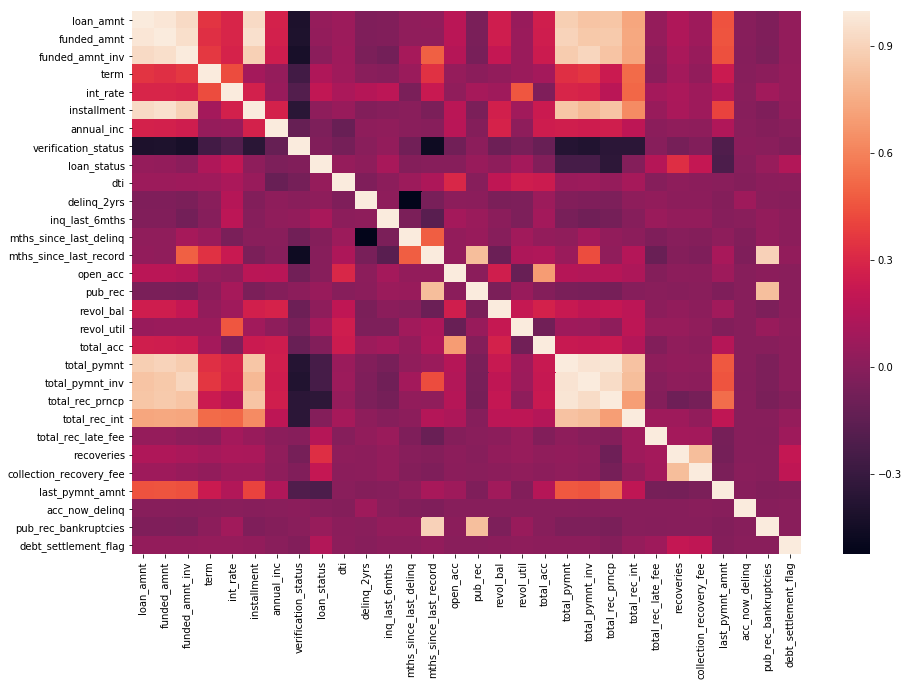

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(loan.corr())

Looking at Heatmap, we can see the corelation between each features.
If we look for the feature 'int_rate', very few features have positive corelation with it. But we can't see any stronger corelation  for 'int_rate' which are more near to 1.

In [85]:
loan.shape

(42535, 42)

Initially, the data had 42538 rows and 145 columns. After processing and cleaning, I was able to reduce this dimension to 42535 rows and 42 columns.